 #### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks). Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [204]:
import numpy as np
from matplotlib import pyplot as plt

In [205]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [206]:
b1 = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
print (f'Коэффициент b1 = {round(b1, 5)}')

Коэффициент b1 = 2.62054


In [207]:
b0 = np.mean(ks) - b1 * np.mean(zp)
print (f'Коэффициент b0 = {round(b0, 5)}')

Коэффициент b0 = 444.17736


Произведём рассчёт коэффициентов линейной регрессии матричным способом

In [208]:
zpm = zp.reshape(10, 1)
ksm = ks.reshape(10, 1)

Сначала с intercept

In [209]:
zpm = np.hstack((np.ones((10, 1)), zpm))

In [210]:
Betta = np.dot(np.dot(np.linalg.inv(np.dot(zpm.T, zpm)), zpm.T), ksm)
b0_mi = Betta[0,0]
b1_mi = Betta[1,0]

print (f'Коэффициент b0, полученный матричным способом = {round(b0_mi, 5)}')
print (f'Коэффициент b1, полученный матричным способом = {round(b1_mi, 5)}')

Коэффициент b0, полученный матричным способом = 444.17736
Коэффициент b1, полученный матричным способом = 2.62054


А теперь без intercept

In [211]:
zpm = zp.reshape(10, 1)

In [212]:
Betta = np.dot(np.dot(np.linalg.inv(np.dot(zpm.T, zpm)), zpm.T), ksm)
b1_mw = Betta[0,0]
print (f'Коэффициент b1, полученный матричным способом без intercept = {round(b1_mw, 5)}')

Коэффициент b1, полученный матричным способом без intercept = 5.88982


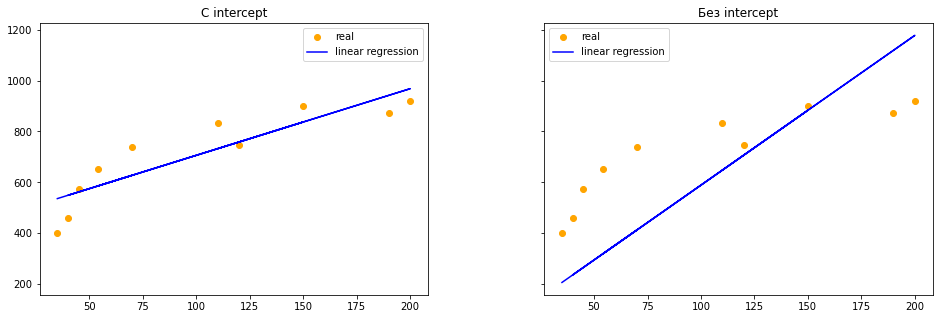

In [213]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)

fig.set_size_inches(16, 5)
fig.subplots_adjust(wspace=0.3)

ax[0].scatter(zp, ks, label = 'real', color = 'orange')
ax[0].plot(zp, b0 + b1 * zp, label = 'linear regression', color = 'blue')
ax[0].set_title("C intercept")
ax[0].legend()

ax[1].scatter(zp, ks, label = 'real', color = 'orange')
ax[1].plot(zp, b1_mw * zp, label = 'linear regression', color = 'blue')
ax[1].set_title("Без intercept")
ax[1].legend()

plt.show()

#### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [214]:
b1_g = 1
alpha = 1e-6
n = len(zp)

In [215]:
def MSE(B1, X, Y, N):
  return np.sum((B1 * X - Y) ** 2) / N

for i in range (1001):
    b1_g -= alpha * (2/n) * np.sum((b1_g * zp - ks) * zp)
    
    if i%50 == 0:
        print(f'На итерации {i} коэффициент b1 = {b1_g} а mse = {MSE(b1_g, zp, ks, n)} ')

print (f'Коэффициент b1, полученный градиентным спуском без intercept = {round(b1_g, 5)}')        

На итерации 0 коэффициент b1 = 1.1347302 а mse = 368017.9491755833 
На итерации 50 коэффициент b1 = 4.713701223813462 а mse = 75573.428039321 
На итерации 100 коэффициент b1 = 5.598920289974488 а mse = 57682.67406321302 
На итерации 150 коэффициент b1 = 5.817869476732655 а mse = 56588.179023299155 
На итерации 200 коэффициент b1 = 5.872024146706 а mse = 56521.22156616817 
На итерации 250 коэффициент b1 = 5.885418707897776 а mse = 56517.125338317 
На итерации 300 коэффициент b1 = 5.8887317050891275 а mse = 56516.874745129535 
На итерации 350 коэффициент b1 = 5.8895511384571 а mse = 56516.859414696795 
На итерации 400 коэффициент b1 = 5.8897538162759355 а mse = 56516.858476833426 
На итерации 450 коэффициент b1 = 5.889803946402255 а mse = 56516.85841945816 
На итерации 500 коэффициент b1 = 5.8898163455368975 а mse = 56516.85841594815 
На итерации 550 коэффициент b1 = 5.889819412326295 а mse = 56516.8584157334 
На итерации 600 коэффициент b1 = 5.889820170862877 а mse = 56516.85841572027 


#### 3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [231]:
b0_gi = 444
b1_gi = 1
alpha = 1e-5
n = len(zp)

def MSE(B0, B1, X, Y, N):
  return np.sum((B0 + B1 * X - Y) ** 2) / N

for i in range (2000001):
    y_pred = b0_gi + b1_gi * zp
    
    error = ks - y_pred
    
    b0i_grad = np.sum(-2 * error) / n
    b1i_grad = np.sum(-2 * (zp * error))/ n
    
    b0_gi = b0_gi - alpha * b0i_grad
    b1_gi = b1_gi - alpha * b1i_grad   
    
    if i%100000 == 0:
        print(f'На итерации {i} коэффициент b0 = {b0_gi}, коэффициент b1 = {b1_gi}, а mse = {MSE(b0_gi, b1_gi, zp, ks, n)} ')
            

На итерации 0 коэффициент b0 = 444.00329, коэффициент b1 = 1.44687, а mse = 25489.12385362308 
На итерации 100000 коэффициент b0 = 444.07775535885884, коэффициент b1 = 2.621271996905409, а mse = 6470.416717672479 
На итерации 200000 коэффициент b0 = 444.1173852950992, коэффициент b1 = 2.620980303053279, а mse = 6470.4151135191105 
На итерации 300000 коэффициент b0 = 444.14124715046995, коэффициент b1 = 2.6208046692478177, а mse = 6470.414531941662 
На итерации 400000 коэффициент b0 = 444.1556147774712, коэффициент b1 = 2.620698917160796, а mse = 6470.414321093793 
На итерации 500000 коэффициент b0 = 444.16426576886744, коэффициент b1 = 2.6206352420392967, а mse = 6470.414244651989 
На итерации 600000 коэффициент b0 = 444.1694746772166, коэффициент b1 = 2.620596902170856, а mse = 6470.414216938416 
На итерации 700000 коэффициент b0 = 444.172611049099, коэффициент b1 = 2.6205738170871324, а mse = 6470.414206891 
На итерации 800000 коэффициент b0 = 444.1744995116887, коэффициент b1 = 2.62

In [232]:
print (f'Коэффициент b0, полученный градиентным спуском  = {round(b0_gi, 5)}')   
print (f'Коэффициент b0, полученный градиентным спуском  = {round(b1_gi, 5)}')   

Коэффициент b0, полученный градиентным спуском  = 444.17735
Коэффициент b0, полученный градиентным спуском  = 2.62054
